<a href="https://colab.research.google.com/github/MiteshBhula/AI-ML-Projects/blob/main/Mitesh_Bhula_ET_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Technique Project: Travel Package Purchase Prediction

## Problem Statement

### Context

The policymaker of a tourism company named "Visit with us" wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, and King. Looking at the data of the last year, it was observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is a package that allows the traveler to maintain, enhance, or kick-start a healthy lifestyle, and support or increase one's sense of well-being. For the launch of the new package, the company wants to harness the available data of existing and potential customers to target the right customers.

### Objective

You as a Data Scientist at "Visit with us" travel company has to analyze the customer data and information to provide recommendations to the policymaker and build a model to predict the chances of a potential customer purchasing the newly introduced travel package before the customer is contacted.

### Data Dictionary

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: Sales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

## Importing necessary libraries

In [ ]:
# Importing the required python libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
# Data visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [ ]:
# Reading the data set
data=pd.read_excel("Tourism.xlsx",sheet_name='Tourism')

In [ ]:
cdata = data.copy()

## Data Overview

In [ ]:
# First 5 rows of the data set
cdata.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
# Last 5 rows of the dataset
cdata.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [ ]:
# Shape of the data
print(f"There are {cdata.shape[0]} rows and {cdata.shape[1]} columns.")

There are 4888 rows and 20 columns.


In [ ]:
# Datatypes of each column with the dataset
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

There are missing values for the age, TypeofContact, DurationofPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome columns

In [ ]:
# Statistical summary of the data
cdata.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [ ]:
# Checking for unique values in each column
# CustomerID
print('There are:', cdata['CustomerID'].nunique(), 'unique values for CustomerID')

There are: 4888 unique values for CustomerID


In [ ]:
# Checking for unique values in each column
# ProdTaken
print('There are:', cdata['ProdTaken'].nunique(), 'unique values for ProdTaken')

There are: 2 unique values for ProdTaken


In [ ]:
# Checking for unique values in each column
# Age
print('There are:', cdata['Age'].nunique(), 'unique values for Age')

There are: 44 unique values for Age


In [ ]:
# Checking for unique values in each column
# TypeofContact
print('There are:', cdata['TypeofContact'].nunique(), 'unique values for TypeofContact')

There are: 2 unique values for TypeofContact


In [ ]:
# Checking for unique values in each column
# CityTier
print('There are:', cdata['CityTier'].nunique(), 'unique values for CityTier')

There are: 3 unique values for CityTier


In [ ]:
# Checking for unique values in each column
# DurationOfPitch
print('There are:', cdata['DurationOfPitch'].nunique(), 'unique values for DurationOfPitch')

There are: 34 unique values for DurationOfPitch


In [ ]:
# Checking for unique values in each column
# Occupation
print('There are:', cdata['Occupation'].nunique(), 'unique values for Occupation')

There are: 4 unique values for Occupation


In [ ]:
# Checking for unique values in each column
# Gender
print('There are:', cdata['Gender'].nunique(), 'unique values for Gender')

There are: 3 unique values for Gender


We are expecting 2 values for gender, Male or Female. The third value is identifed as a spelling mistake in the word female.

In [ ]:
# Checking for unique values in each column
# NumberOfPersonVisiting
print('There are:', cdata['NumberOfPersonVisiting'].nunique(), 'unique values for NumberOfPersonVisiting')

There are: 5 unique values for NumberOfPersonVisiting


In [ ]:
# Checking for unique values in each column
# NumberOfFollowups
print('There are:', cdata['NumberOfFollowups'].nunique(), 'unique values for NumberOfFollowups')

There are: 6 unique values for NumberOfFollowups


In [ ]:
# Checking for unique values in each column
# ProductPitched
print('There are:', cdata['ProductPitched'].nunique(), 'unique values for ProductPitched')

There are: 5 unique values for ProductPitched


In [ ]:
# Checking for unique values in each column
# PreferredPropertyStar
print('There are:', cdata['PreferredPropertyStar'].nunique(), 'unique values for PreferredPropertyStar')

There are: 3 unique values for PreferredPropertyStar


In [ ]:
# Checking for unique values in each column
# MaritalStatus
print('There are:', cdata['MaritalStatus'].nunique(), 'unique values for MaritalStatus')

There are: 4 unique values for MaritalStatus


In [ ]:
# Checking for unique values in each column
# NumberOfTrips
print('There are:', cdata['NumberOfTrips'].nunique(), 'unique values for NumberOfTrips')

There are: 12 unique values for NumberOfTrips


In [ ]:
# Checking for unique values in each column
# Passport
print('There are:', cdata['Passport'].nunique(), 'unique values for Passport')

There are: 2 unique values for Passport


In [ ]:
# Checking for unique values in each column
# PitchSatisfactionScore
print('There are:', cdata['PitchSatisfactionScore'].nunique(), 'unique values for PitchSatisfactionScore')

There are: 5 unique values for PitchSatisfactionScore


In [ ]:
# Checking for unique values in each column
# OwnCar
print('There are:', cdata['OwnCar'].nunique(), 'unique values for OwnCar')

There are: 2 unique values for OwnCar


In [ ]:
# Checking for unique values in each column
# NumberOfChildrenVisiting
print('There are:', cdata['NumberOfChildrenVisiting'].nunique(), 'unique values for NumberOfChildrenVisiting')

There are: 4 unique values for NumberOfChildrenVisiting


In [ ]:
# Checking for unique values in each column
# Designation
print('There are:', cdata['Designation'].nunique(), 'unique values for Designation')

There are: 5 unique values for Designation


In [ ]:
# Checking for unique values in each column
# MonthlyIncome
print('There are:', cdata['Designation'].nunique(), 'unique values for MonthlyIncome')

There are: 5 unique values for MonthlyIncome


In [ ]:
# Dropping the CustomerID column
cdata.drop(columns=['CustomerID'], inplace=True)

In [ ]:
# Identifying all missing values
cdata.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

List of all columns that have missing values.

In [ ]:
# Checking for repetitive values
#Making a list of all catergorical variables
cat_col=['TypeofContact', 'CityTier','Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(cdata[column].value_counts())
    print('-'*50)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
--------------------------------------------------
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
--------------------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------

In [ ]:
#Replacing 'Fe Male' with 'Female'
cdata.Gender = cdata.Gender.replace('Fe Male', 'Female')

In [ ]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    cdata[column] = cdata[column].astype('category')

In [ ]:
# Checking new data types
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4843 non-null   category
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the monthly income of customers? Are there any noticeable patterns or outliers in the distribution?
2. Which travel package is pitched the most by the salespersons to the customers?
3. How are the different customer attributes correlated to each other?
4. How does a customer's interest in purchasing the newly introduced travel package vary with their occupation?
5. How does a customer's interest in purchasing the newly introduced travel package vary with their marital status?

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

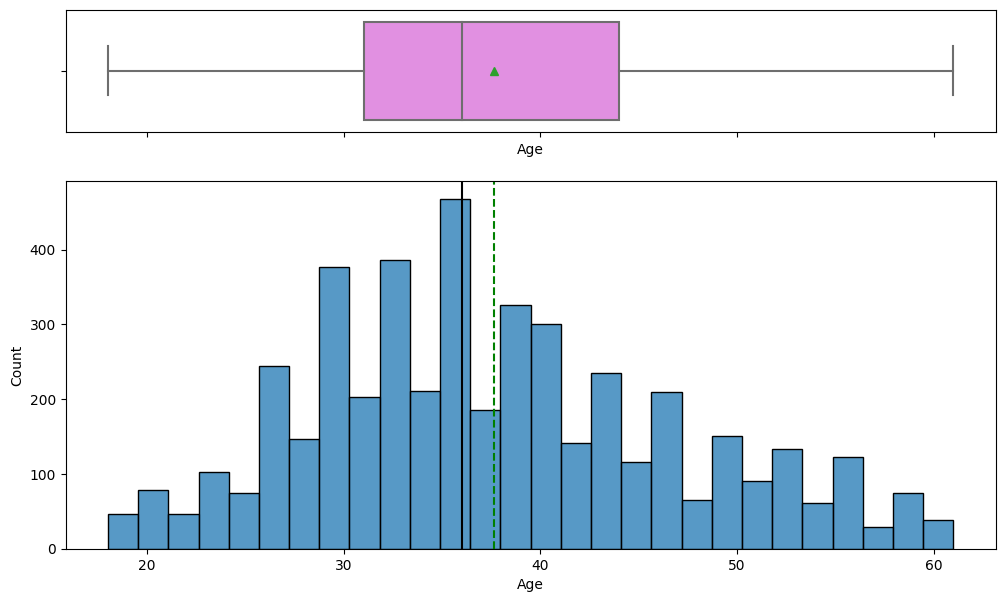

In [ ]:
# Observation on Age
histogram_boxplot(cdata, "Age")

Age is skewed to the right, indicating that their are many outliers greater than the median age.

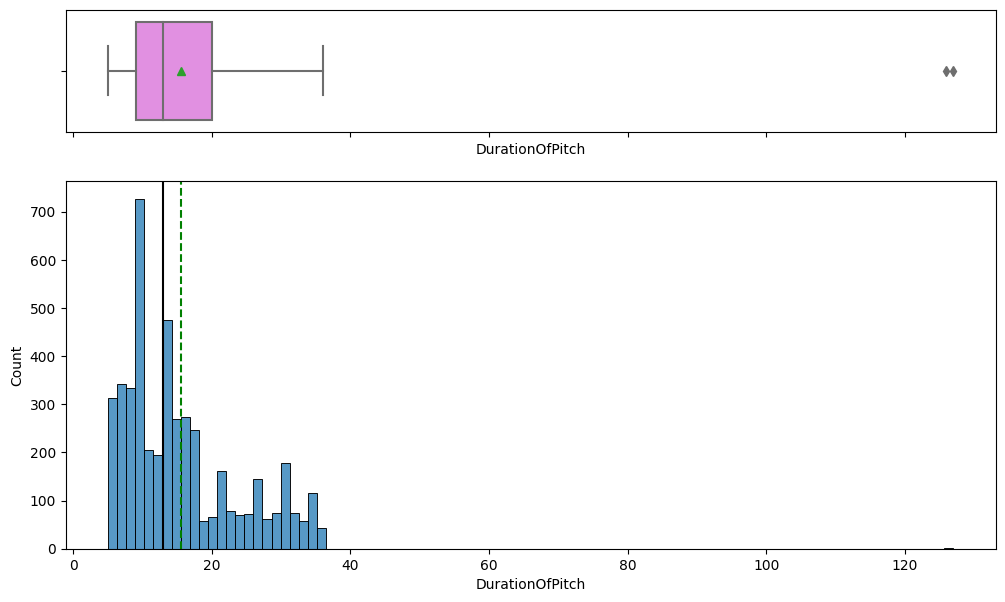

In [ ]:
# Observation on Duration of Pitch
histogram_boxplot(cdata, "DurationOfPitch")

Duration of pitch is also right skewed indicating many pitch presentations took longer than expected.

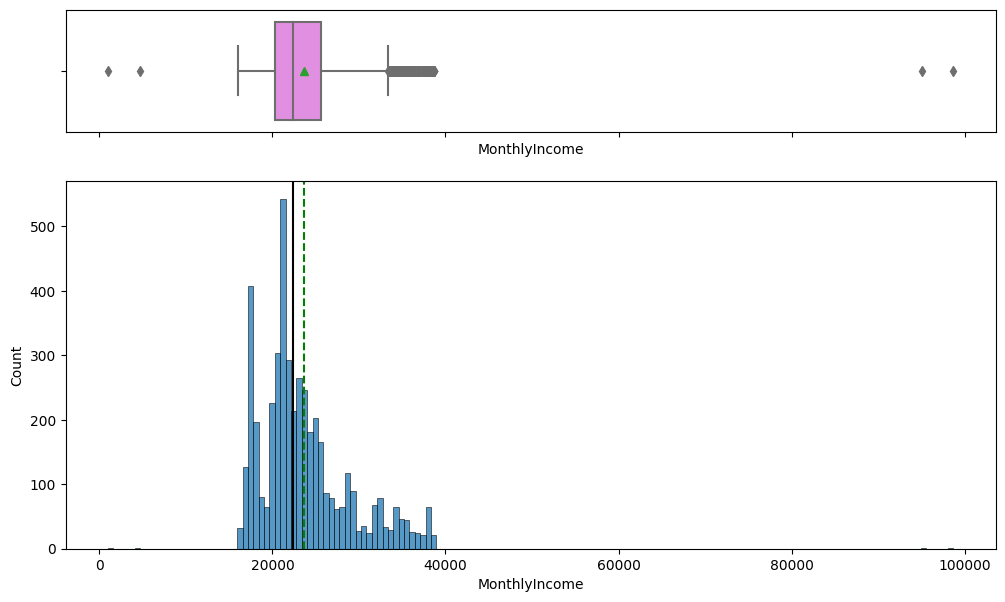

In [ ]:
# Observation on Monthly Income
histogram_boxplot(cdata, "MonthlyIncome")

Monthly income is skewed to the right, many tourists have a monthly income greater than the mean.

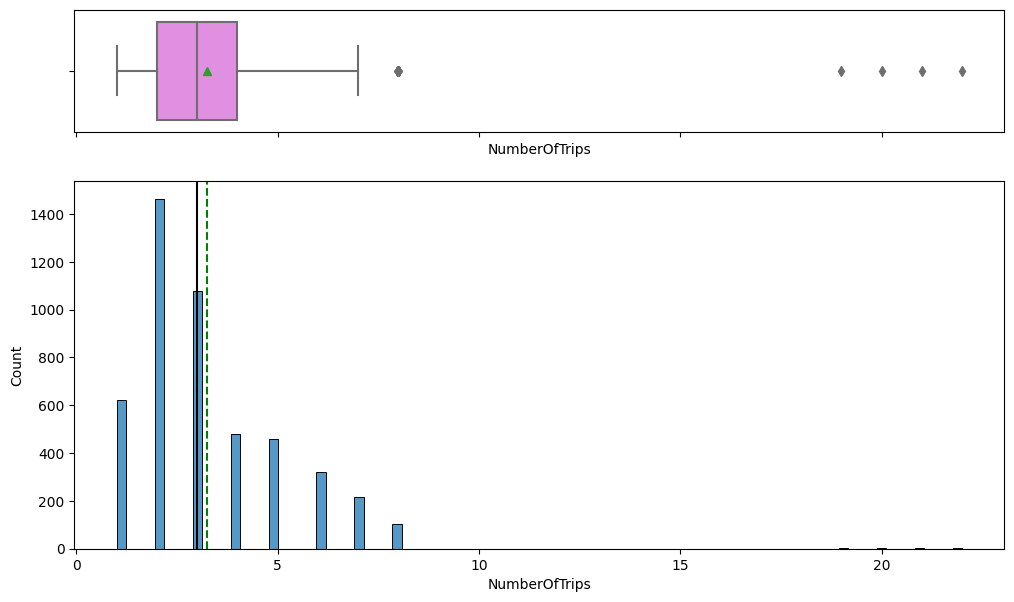

In [ ]:
# Observation on Number of trips
histogram_boxplot(cdata, "NumberOfTrips")

Number of trips is right skewed too, many tourists take more than the average number of trips.

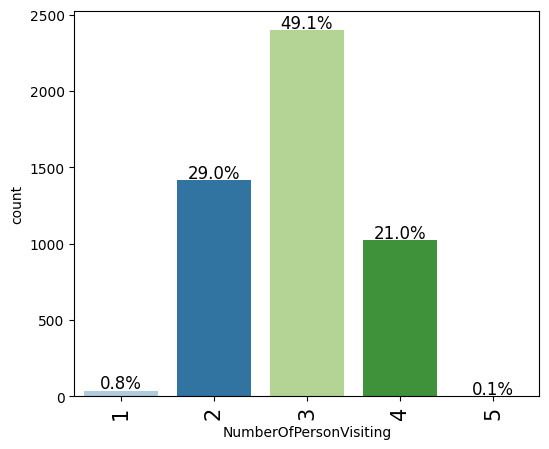

In [ ]:
# Observation on Number of persons visiting
labeled_barplot(cdata, "NumberOfPersonVisiting", perc=True)

As per the barplot, we see almost 50% tourists travel in groups of 3.

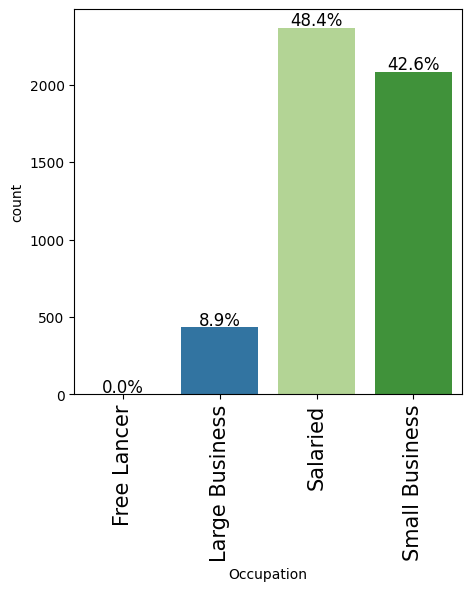

In [ ]:
# Observation on Occupation
labeled_barplot(cdata, "Occupation", perc=True)

Majority of tourists are employed or have their own small business.

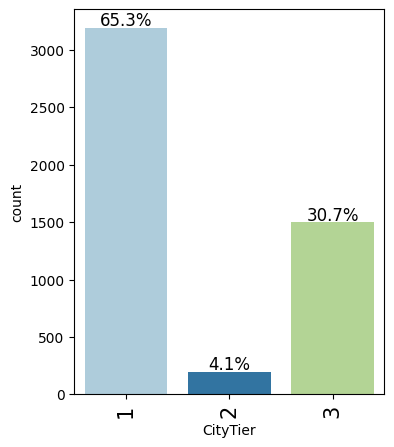

In [ ]:
# Observation on City tier
labeled_barplot(cdata, "CityTier", perc=True)

Tier 1 may indicate that most tourists live in the city as opposed to the country side or rural areas.

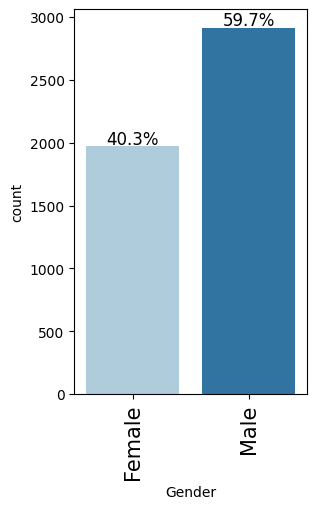

In [ ]:
# Observation on Gender
labeled_barplot(cdata, "Gender", perc=True)

Majority of tourists are male.

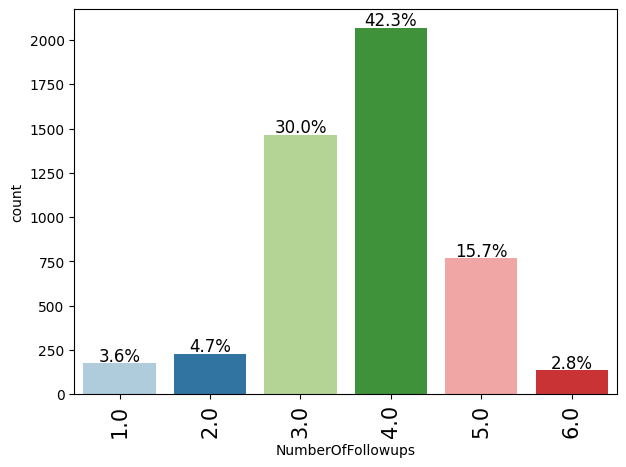

In [ ]:
# Observation on Number of follow ups
labeled_barplot(cdata, "NumberOfFollowups", perc=True)

Tourists follow up 4 times to book and clarify details regarding their trips.

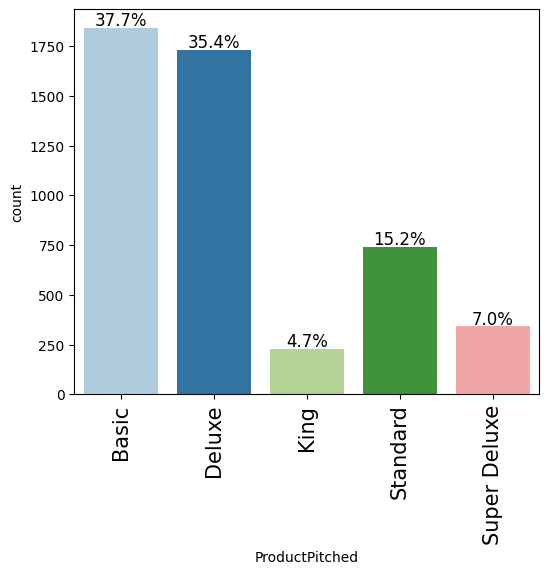

In [ ]:
# Observation on Products pitched
labeled_barplot(cdata, "ProductPitched", perc=True)

As many tourists do not have a very high income, it is understandable that this diagram shows the basic package as the most popular and with 3 travellers being the most common way to travel.

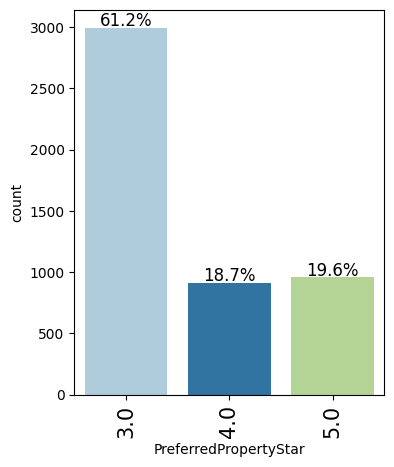

In [ ]:
# Observation on Preferred Property Star
labeled_barplot(cdata, "PreferredPropertyStar", perc=True)

Travellers prefer 3 star accomodation, in correlation to their income and basic holiday package chosen.

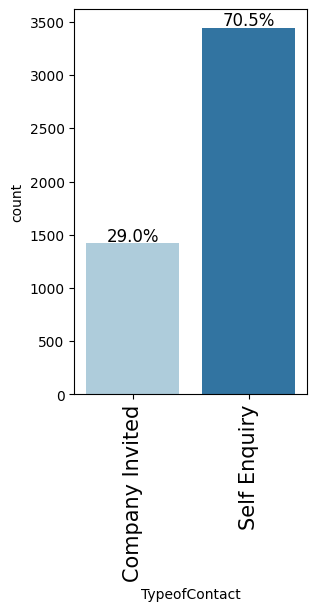

In [ ]:
# Observation on Type of contact
labeled_barplot(cdata, "TypeofContact", perc=True)

A large number of tourists book their own holidays.

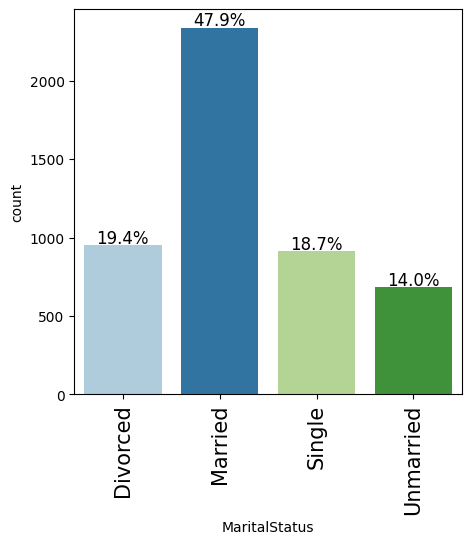

In [ ]:
# Observation on Marital status
labeled_barplot(cdata, "MaritalStatus", perc=True)

Married couples are the most popular tourists.

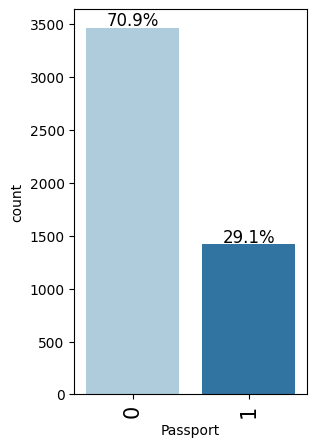

In [ ]:
# Observation on Passport
labeled_barplot(cdata, "Passport", perc=True)

70% of tourists do not have a passport, which could indicate they prefer travelling domestically.

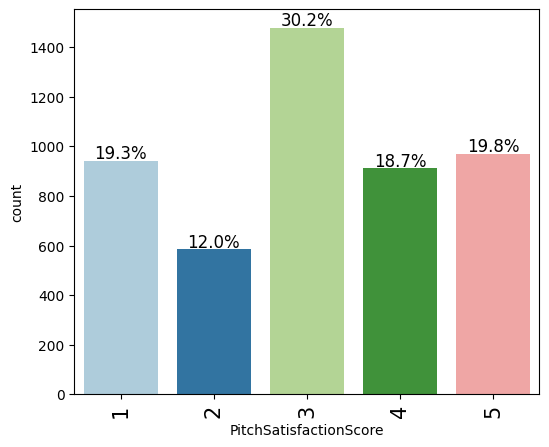

In [ ]:
# Observation on Pitch Satisfaction Score
labeled_barplot(cdata, "PitchSatisfactionScore", perc=True)

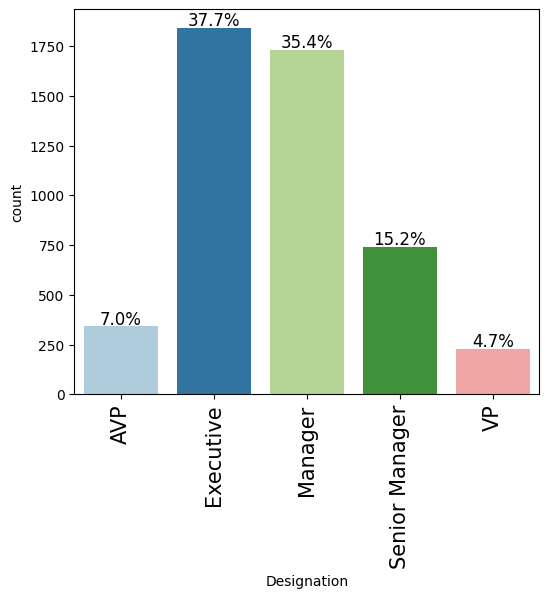

In [ ]:
# Observation on Designation
labeled_barplot(cdata, "Designation", perc=True)

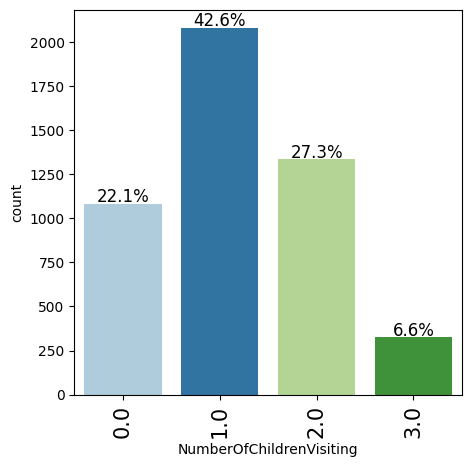

In [ ]:
# Observation on Number Of Children Visiting
labeled_barplot(cdata, "NumberOfChildrenVisiting", perc=True)

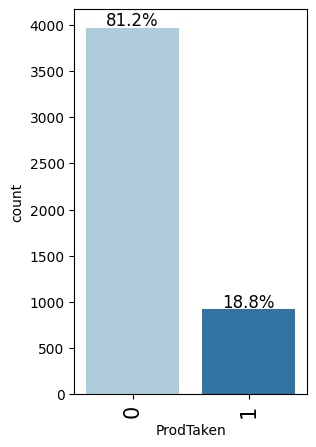

In [ ]:
# Observation on Products taken
labeled_barplot(cdata, "ProdTaken", perc=True)

In [ ]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

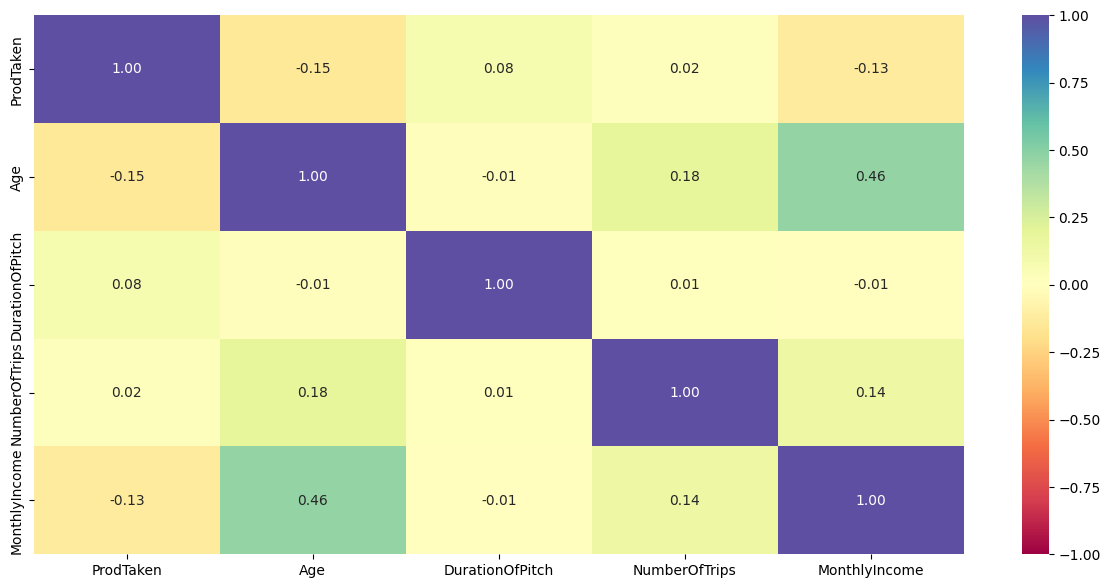

In [ ]:
# Correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(cdata.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


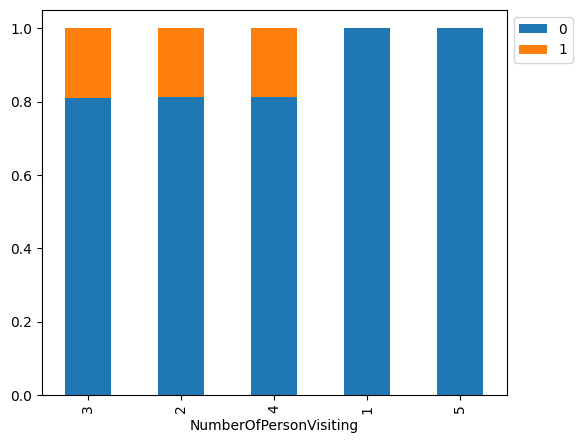

In [ ]:
# Product taken vs number of people visitng
stacked_barplot(cdata, "NumberOfPersonVisiting", "ProdTaken" )

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


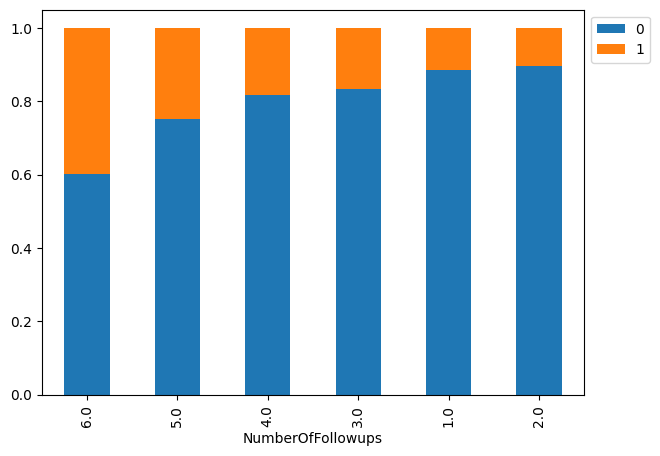

In [ ]:
# Product taken vs number of Follow ups
stacked_barplot(cdata, "NumberOfFollowups", "ProdTaken" )

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


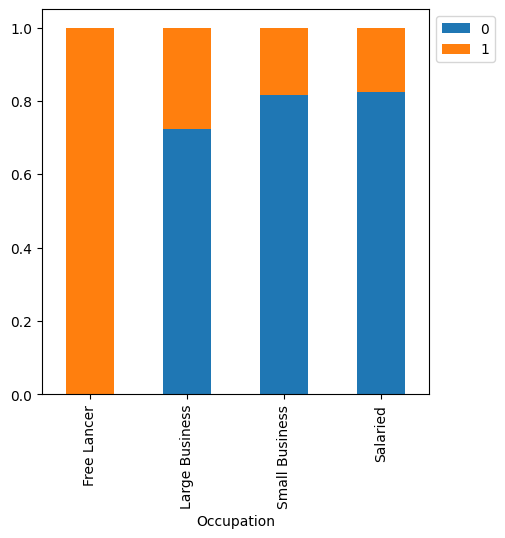

In [ ]:
# Product taken vs Occupation
stacked_barplot(cdata, "Occupation", "ProdTaken" )

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


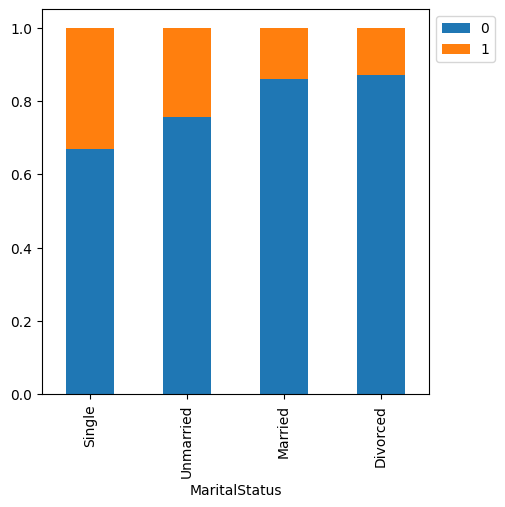

In [ ]:
# Product taken vs Martial status
stacked_barplot(cdata, "MaritalStatus", "ProdTaken" )

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


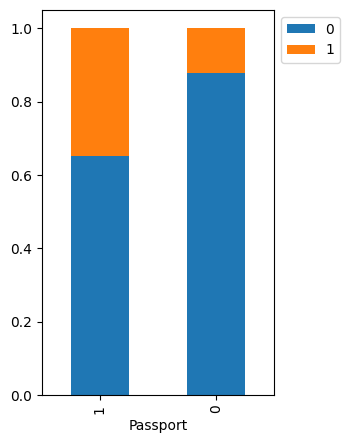

In [ ]:
# Product taken vs Passport
stacked_barplot(cdata, "Passport", "ProdTaken" )

In [ ]:
# Product taken vs ProductPitched
stacked_barplot(cdata, "ProductPitched", "ProdTaken" )

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


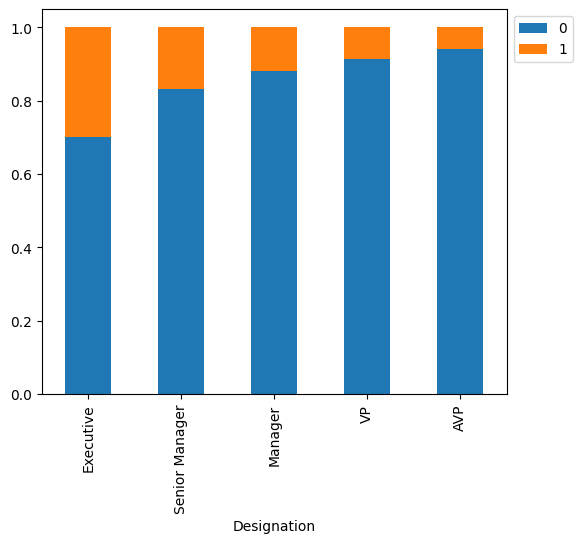

In [ ]:
# Product taken vs Designation
stacked_barplot(cdata, "Designation", "ProdTaken" )

ProdTaken           0    1   All
DurationOfPitch                 
All              3762  875  4637
9.0               404   79   483
8.0               273   60   333
16.0              218   56   274
15.0              217   52   269
7.0               294   48   342
10.0              199   45   244
14.0              212   41   253
6.0               268   39   307
11.0              168   37   205
12.0              162   33   195
13.0              191   32   223
31.0               52   31    83
30.0               65   30    95
17.0              148   24   172
22.0               66   23    89
19.0               36   21    57
23.0               58   21    79
29.0               53   21    74
18.0               56   19    75
20.0               46   19    65
28.0               44   17    61
21.0               57   16    73
24.0               54   16    70
32.0               59   15    74
27.0               58   14    72
25.0               59   14    73
26.0               60   12    72
33.0      

<Figure size 1500x500 with 0 Axes>

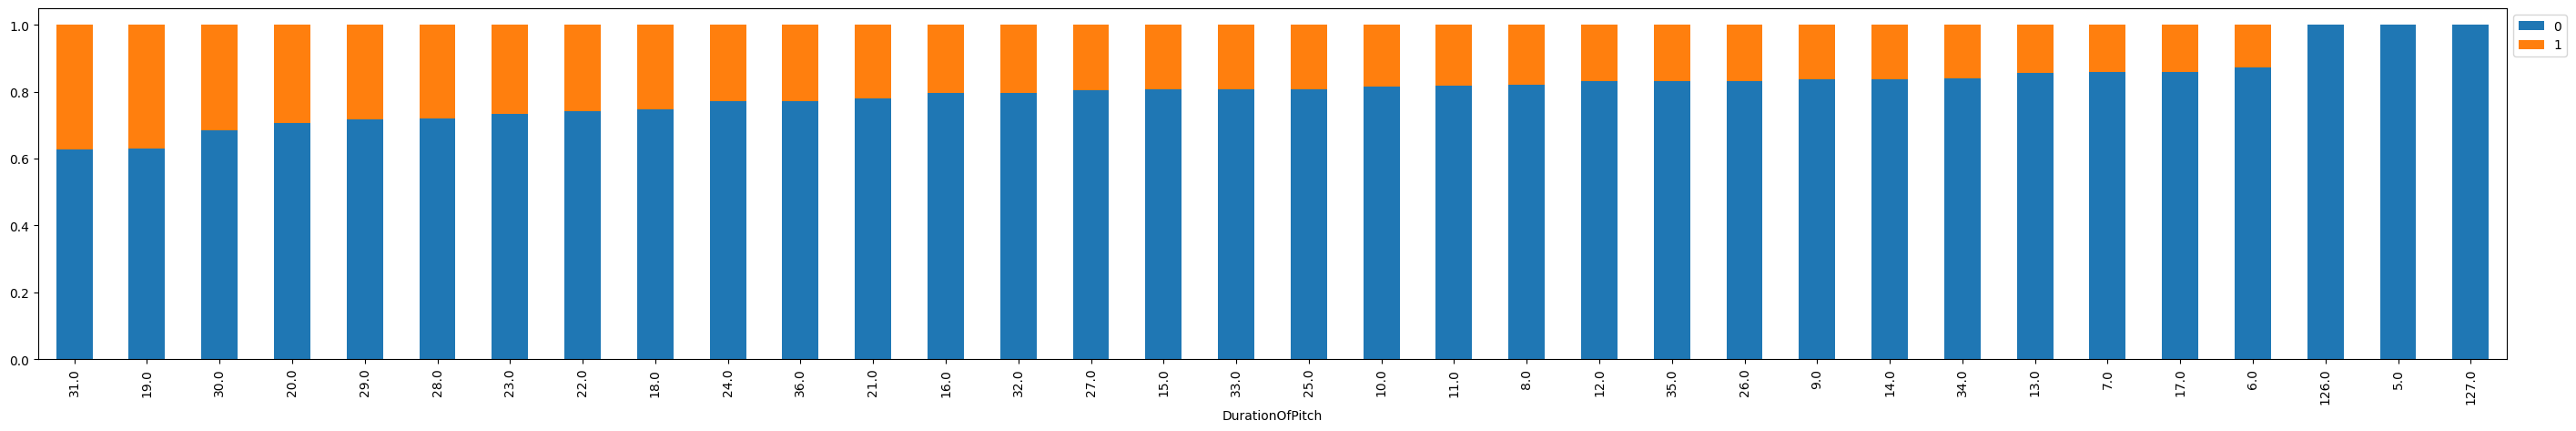

In [ ]:
# Product taken vs DurationOfPitch
plt.figure(figsize=(15,5))
stacked_barplot(cdata, "DurationOfPitch", "ProdTaken" )
plt.show()

In [ ]:
# Product taken vs MonthlyIncome
plt.figure(figsize=(15,5))
stacked_barplot(cdata, "MonthlyIncome", "ProdTaken" )
plt.show()

ProdTaken         0    1   All
MonthlyIncome                 
All            3767  888  4655
17404.0           1    4     5
20971.0           0    4     4
21082.0           1    4     5
17293.0           0    4     4
...             ...  ...   ...
21534.0           1    0     1
21524.0           2    0     2
21522.0           2    0     2
21515.0           1    0     1
22664.0           1    0     1

[2476 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


<Figure size 10000x500 with 0 Axes>

ValueError: ignored

<Figure size 247600x500 with 1 Axes>

Designation  AVP  Executive  Manager  Senior Manager   VP   All
ProdTaken                                                      
All          342       1842     1732             742  230  4888
0            322       1290     1528             618  210  3968
1             20        552      204             124   20   920
------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x500 with 0 Axes>

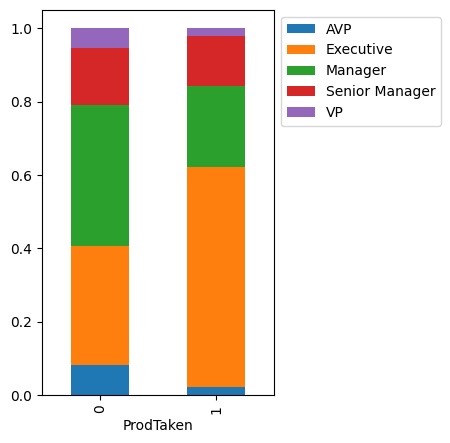

In [ ]:
# Product taken vs MonthlyIncome vs Designation
plt.figure(figsize=(15,5))
stacked_barplot(cdata, "ProdTaken", "Designation")
plt.show()

In [ ]:
# Customer profile based on Travel Package - Basic
cdata[(cdata['ProductPitched'] == 'Basic') & (cdata['ProdTaken'] == 1)].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,552.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,515.0,NaN,NaN,NaN,31.28932,9.070829,18.0,25.0,30.0,35.0,59.0
TypeofContact,549,2,Self Enquiry,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,552.0,3.0,1.0,392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,532.0,NaN,NaN,NaN,15.791353,7.906926,6.0,9.0,14.0,22.0,36.0
Occupation,552,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,552,2,Male,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,552.0,3.0,3.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,548.0,6.0,4.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,552,1,Basic,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Customer profile based on Travel Package - Standard
cdata[(cdata['ProductPitched'] == 'Standard') & (cdata['ProdTaken'] == 1)].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,124.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,123.0,NaN,NaN,NaN,41.00813,9.876695,19.0,33.0,38.0,49.0,60.0
TypeofContact,124,2,Self Enquiry,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,124.0,3.0,3.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,123.0,NaN,NaN,NaN,19.065041,9.048811,6.0,11.0,17.0,29.0,36.0
Occupation,124,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,124,2,Male,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,124.0,3.0,3.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,124.0,6.0,4.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,124,1,Standard,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Customer profile based on Travel Package - Deluxe
cdata[(cdata['ProductPitched'] == 'Deluxe') & (cdata['ProdTaken'] == 1)].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,204.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,198.0,NaN,NaN,NaN,37.641414,8.469575,21.0,32.0,35.5,44.0,59.0
TypeofContact,204,2,Self Enquiry,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,204.0,2.0,3.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,180.0,NaN,NaN,NaN,19.1,9.227176,6.0,11.0,16.0,28.0,36.0
Occupation,204,3,Small Business,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,204,2,Male,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,204.0,3.0,3.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,200.0,6.0,4.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,204,1,Deluxe,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Customer profile based on Travel Package - Super Deluxe
cdata[(cdata['ProductPitched'] == 'Super Deluxe') & (cdata['ProdTaken'] == 1)].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,43.5,4.83953,39.0,40.0,42.0,45.25,56.0
TypeofContact,20,2,Company Invited,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,3.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,18.5,7.330542,8.0,15.0,18.5,20.0,31.0
Occupation,20,2,Salaried,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,6.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,20,1,Super Deluxe,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Customer profile based on Travel Package - King
cdata[(cdata['ProductPitched'] == 'King') & (cdata['ProdTaken'] == 1)].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,48.9,9.618513,27.0,42.0,52.5,56.0,59.0
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,10.5,4.135851,8.0,8.0,9.0,9.0,19.0
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,4.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,20,1,King,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Outlier Detection and treatment
100 * cdata.NumberOfTrips.value_counts(normalize = True)

2.0     30.834035
3.0     22.725358
1.0     13.058130
4.0     10.067397
5.0      9.646167
6.0      6.781803
7.0      4.591407
8.0      2.211457
19.0     0.021061
21.0     0.021061
20.0     0.021061
22.0     0.021061
Name: NumberOfTrips, dtype: float64

In [ ]:
# Removing duration of pitch, monthly income and number of trips as they are outliers
# Dropping columns with a pitch duration greater than 40.
cdata.drop(index = cdata[cdata.DurationOfPitch > 37].index, inplace = True)

# Dropping monthly incomes less than 12000 or greater than 40000.
cdata.drop(index = cdata [(cdata.MonthlyIncome > 40000 | (cdata.MonthlyIncome < 12000))].index, inplace = True)

# Dropping number of trips greater than 8
cdata.drop(index = cdata[cdata.NumberOfTrips > 8].index, inplace= True)

In [ ]:
# Data preparation for modeling
X = cdata.drop(columns = 'ProdTaken')
Y = cdata['ProdTaken']

In [ ]:
# Dropping columns
X.drop(columns=['DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'],inplace=True)

In [ ]:
# Splitting data into a train and test set
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [ ]:
cdata['Age'] = cdata['Age'].transform(lambda x: x.fillna(x.median()))
cdata['MonthlyIncome'] = cdata['MonthlyIncome'].transform(lambda x: x.fillna(x.median()))
cdata['NumberOfTrips'] = cdata['NumberOfTrips'].transform(lambda x: x.fillna(x.median()))

In [ ]:
X_train['MonthlyIncome'] = X_train['MonthlyIncome'].replace(np.nan, 23619.853491)

In [ ]:
# Initializing the SimpleImputer method with median
si1=SimpleImputer(strategy='median')

# Assigning the columns to be imputed
median_imputed_col=['Age']

#Fit and transform the train data
X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])

In [ ]:
si1 = SimpleImputer(strategy='median')
si1.fit(X_train[['Age']])
X_train[['Age']] = si1.transform(X_train[['Age']])

In [ ]:
si1 = SimpleImputer(strategy='median')
si1.fit(X_train[['MonthlyIncome']])
X_train[['MonthlyIncome']] = si1.transform(X_train[['MonthlyIncome']])

ValueError: ignored

In [ ]:
# Initializing the SimpleImputer method with most_frequent
si2=SimpleImputer(strategy='most_frequent')

# Assigning the columns to be imputed
mode_imputed_col=['TypeofContact','PreferredPropertyStar','NumberOfChildrenVisiting']

#Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

#Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

In [ ]:
print(X_train.isna().sum())
print('-' * 30)
print(y_train.isna().sum())

CustomerID                      0
Age                             0
NumberOfPersonVisiting          0
PreferredPropertyStar           0
NumberOfTrips                   0
Passport                        0
OwnCar                          0
NumberOfChildrenVisiting        0
MonthlyIncome                 233
TypeofContact_Self Enquiry      0
Occupation_Salaried             0
Occupation_Small Business       0
Gender_Male                     0
MaritalStatus_Married           0
MaritalStatus_Single            0
Designation_Manager             0
CityTier_2                      0
CityTier_3                      0
dtype: int64
------------------------------
0


In [ ]:
# Creating of dummy variables for string variables and converting columns to type float
for col in ['NumberOfPersonVisiting', 'Passport', 'OwnCar']:
  X_train[col] = X_train[col].astype('float')
  X_test[col] = X_test[col].astype('float')

In [ ]:
# Column list of dummy variables that need to be created
dummy_columns = ['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier']

In [ ]:
# Encoding categorical variables
X_train = pd.get_dummies(X, columns = dummy_columns, drop_first = True)
X_test = pd.get_dummies(X, columns = dummy_columns, drop_first = True)

In [ ]:
cdata[(cdata['ProductPitched'] == 'King') & (cdata['ProdTaken'] == 1)].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProdTaken,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeofContact,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Simple Imputer is entering Nan Values into my cdata dataframe, I cannot create the decision tree as my X_train contains NaN values.

## Model Building

### Model Evaluation Criterion

**The model can make wrong predictions as:**
1. Predicting a customer will buy the product and the customer doesn't buy - Loss of resources
2. Predicting a customer will not buy the product and the customer buys - Loss of opportunity

* The company wants Recall to be maximized, the greater the Recall lesser the chances of false negatives.


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building: Decision Tree

In [ ]:
# build Decision Tree Classifier Model
d_tree = DecisionTreeClassifier(random_state=1)

## Complete the code to Fit the decision tree model on X_train and y_train
d_tree.fit(X_train,y_train)

ValueError: ignored

### Model Improvement: Decision Tree

In [ ]:
#Calculating different metrics
d_tree_model_train_perf = model_performance_classification_sklearn(d_tree, X_train,y_train)
print("Training performance:\n", d_tree_model_train_perf)

ValueError: ignored

In [ ]:
# Model performance on test data
d_tree_model_test_perf = model_performance_classification_sklearn(d_tree, X_test, y_test)
print("Testing performance: \n", d_tree_model_test_perf)

In [ ]:
# Confusion matrix for test data
confusion_matrix_sklearn(d_tree, X_test, y_test)

ValueError: ignored

In [ ]:
# Model improvement: Decision Tree
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Complete the code to fit the above model on train data.
dtree_estimator.fit(X_train, y_train)

In [ ]:
# Checking model performance on the training data
dtree_estimator_model_train_perf = model_performance_classification_sklearn(d_tree, X_train,y_train)
print("Training performance:\n", dtree_estimator_model_train_perf)

In [ ]:
# Checking model performance on the test data
dtree_estimator_model_test_perf = model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n", dtree_estimator_model_test_perf)

In [ ]:
# Confusion matrix on test data
confusion_matrix_sklearn(d_tree,X_test,y_test)

### Model Building: Random Forest

In [ ]:
# initializing the model
rf_estimator = RandomForestClassifier(random_state = 1)
rf_estimator.fit(X_train, y_train)

In [ ]:
# Checking model performance training data
rf_estimator_model_train_perf = model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training performance:\n", rf_estimator_model_train_perf)

In [ ]:
# Checking model performance test data
rf_estimator_model_test_perf = model_performance_classification_sklearn(d_tree, X_test, y_test)

In [ ]:
# Confusion matrix on test data
confusion_matrix_sklearn(d_tree, X_test, y_test)

### Model Improvement: Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# fit the above model on training data
rf_tuned.fit(X_train, y_train)

In [ ]:
# Checking the model performance on training data
rf_tuned_model_train_perf = model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training performance:\n", rf_tuned_model_train_perf)

In [ ]:
# Model performance on test data
rf_tuned_model_test_perf = model_performance_classification_sklearn(d_tree, X_test, y_test)
print("Testing performance:\n", rf_tuned_model_test_perf)

In [ ]:
# Confusion matrix on test data
confusion_matrix_sklearn(d_tree, X_test, y_test)

### Model Building: Bagging

In [ ]:
# Initializing the Bagging classifier
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

In [ ]:
# Checking model performance on training data
bagging_classifier_model_train_perf = model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)

In [ ]:
# Complete the code to get the model performance on test data
bagging_classifier_model_test_perf = model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Testing performance:\n",bagging_classifier_model_test_perf)

In [ ]:
# Confusion matrix on test data
confusion_matrix_sklearn(bagging_Classifier, X_test, y_test)

### Model Improvement: Bagging

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# fit the model on training data
bagging_estimator_tuned.fit(X_train, y_train)

In [ ]:
# Model performance on training data
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(X_train, y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)

In [ ]:
# Model performance on test data
bagging_estimator_tuned_model_test_perf = model_Performance_Classification_sklearn(X_test, y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

In [ ]:
# Confusion matrix on test data
confusion_matrix_sklearn(baggin_estimator_tuned, X_test, y_test)

### Model Building: AdaBoost

In [ ]:
# Initialising the AdaBoost classifier
ab_classifier = AdaBoostClassifier(random_state = 1)
ab_classifier.fit(X_train, y_train)

In [ ]:
# model performance on training data
ab_classifier_model_train_perf=model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training performance:\n",ab_classifier_model_train_perf)

In [ ]:
# model performance on test data
ab_classifier_model_test_perf=model_performance_classification_sklearn(d_tree, X_test, y_test)
print("Testing performance:\n",ab_classifier_model_test_perf)

In [ ]:
# Confusion matrix on model performance
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

### Model Improvement: AdaBoost

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Complete the code to fit the above model on training data
abc_tuned.fit(X_train, y_train)

In [ ]:
# model performance on training data
abc_tuned_model_train_perf=model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training performance:\n",abc_tuned_model_train_perf)

In [ ]:
# model performance on test data
abc_tuned_model_test_perf=model_performance_classification_sklearn(d_tree, X_test, y_test)
print("Testing performance:\n",abc_tuned_model_test_perf)

In [ ]:
# confusion matrix on test data
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

### Model Building: Gradient Boosting

In [ ]:
# Initializing the Gradient boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

In [ ]:
# Model performance on training data
gb_classifier_model_train_perf = model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training performance:\n", gb_classifier_model_train_perf)

In [ ]:
# Model performance on test data
gb_classifier_model_test_perf = model_performance_classification_sklearn(d_tree, X_test, y_test )
print("Testing performance:\n", gb_classifier_model_test_perf)

In [ ]:
# Confusion matrix for Gradient Boosting model
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

### Model Improvement: Gradient Boosting


In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# fit the model on training data
gbc_tuned.fit(X_train, y_train)

In [ ]:
# Model performance on training data
gbc_tuned_model_train_perf = model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)

In [ ]:
# Model performance on test data
gbc_tuned_model_test_perf=model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Testing performance:\n",gbc_tuned_model_test_perf)

In [ ]:
# Confusion matrix on model performance for test data
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

### Model Building: XGBoost

**Please note XGBoost can take a significantly longer time to run, so if you have time complexity issues then you can avoid tuning XGBoost, and there will no points deducted if XG-boost is not performed**

### Model Improvement: XGBoost


### Model Building: Stacking

In [ ]:
# Initializing different models
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]
final_estimator = gb_classifier
stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)
stacking_classifier.fit(X_train, y_train)

In [ ]:
# Model performance on training data
stacking_classifier_model_train_perf=model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)

In [ ]:
# Model performance on test data
stacking_classifier_model_test_perf=model_performance_classification_sklearn(d_tree, X_test, y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

In [ ]:
# Confusion matrix for model performance on test data
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

### Model Improvement: Stacking


## Model Comparison and Final Model Selection

In [ ]:
# Model performance comparison for training data
models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T, dtree_estimator_model_train_perf.T, rf_estimator_model_train_perf.T,
    rf_tuned_model_train_perf.T,bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T, stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# Model performance comparison for test data
models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T, dtree_estimator_model_test_perf.T, rf_estimator_model_test_perf.T,
    rf_tuned_model_test_perf.T,bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T, stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

## Actionable Insights and Business Recommendations


**What recommedations would you suggest to the Visit with us company?**

*

___